# Program to illustrate the regularization techniques

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_moons

In [2]:
x, y = make_moons(100, noise=0.25, random_state=2)

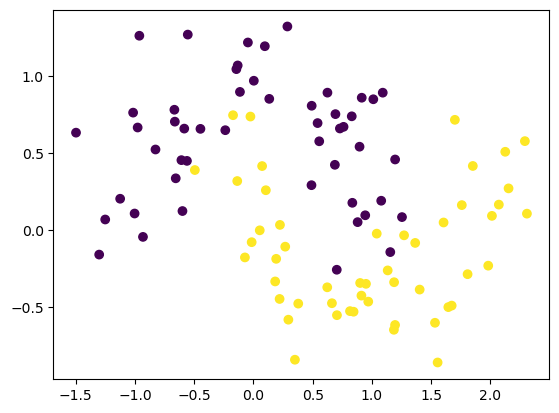

In [3]:
import matplotlib.pyplot as plt
plt.scatter(x[:,0], x[:,1], c=y)
plt.show()

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
from keras import regularizers
from keras.models import Sequential
from keras.optimizers import Adam

model = Sequential([
    Dense(128, input_dim = x.shape[1], kernel_regularizer=regularizers.l1(0.001), activation='relu'),
    Dense(128, kernel_regularizer=regularizers.l1(0.001), activation='relu'),
    Dense(1, activation='sigmoid')
])

    

In [5]:
model.compile(optimizer=Adam(0.01), loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(x, y, validation_split=0.25, epochs=200, verbose=0, batch_size = 20)

9600/9600 [==============================] - 12s 1ms/step


<Axes: >

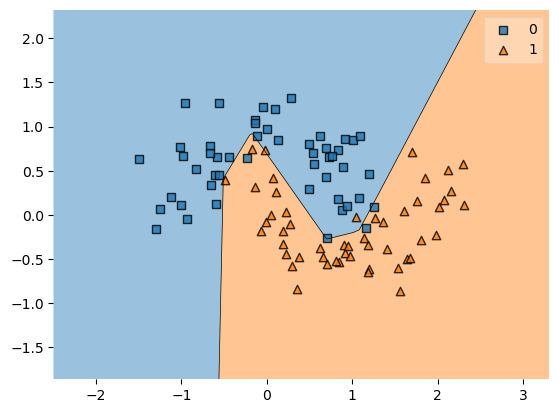

In [6]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x, y.astype('int'), clf=model)

Text(0.5, 1.0, 'Loss Plot')

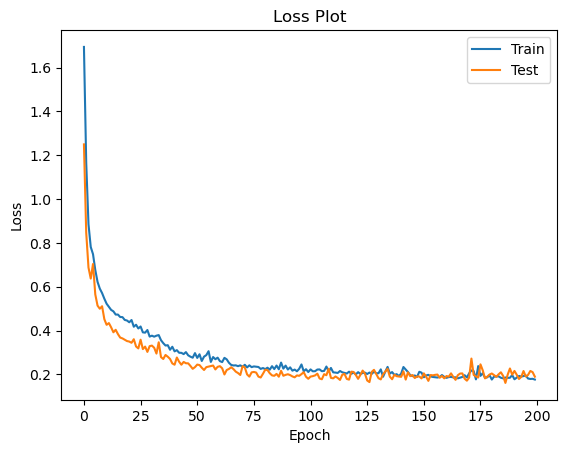

In [7]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Train","Test"])
plt.title('Loss Plot')

In [8]:
print(f"Accuracy: {history.history['accuracy'][-1]*100}%")

Accuracy: 94.66666579246521%
